In [1]:
import numpy as np
import pandas as pd


Importing the cars.csv


In [2]:
cars = pd.read_csv('cars.csv')

Checking first five rows of the dataframe       

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Clean the Data

In [4]:
cars["car name"] = cars['car name'].str.split().str[0]

In [5]:
cars.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford


Convert to european units

1. check the data ty type of each column

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


We observe: 
    1. horsepower is object, we need to convert it into integer type 
 


In [8]:
cars['horsepower'] = cars['horsepower'].replace('?',np.nan)
cars["horsepower"] = pd.to_numeric(cars["horsepower"])

This line here "converted = cars['horsepower'].replace('?',np.nan)" -> is doing ng the following:
    1. it replaces all the '?' with nan values in the column horsepower
    2. it converts the column horsepower from object type to float type
    

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


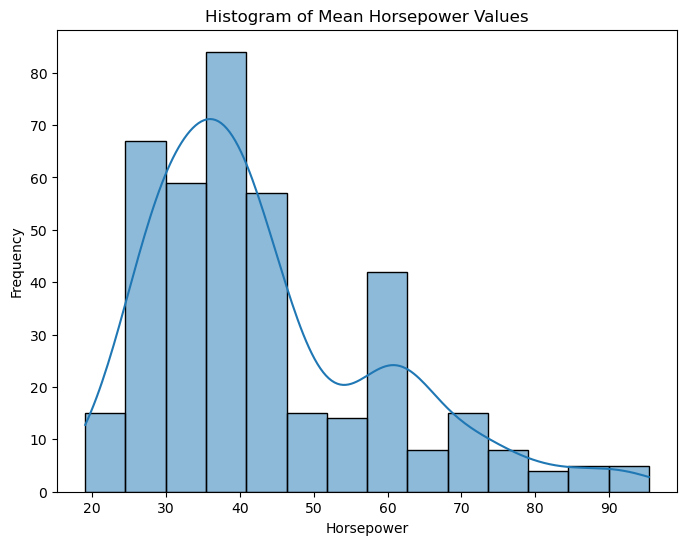

In [20]:

import seaborn as sns
import matplotlib.pyplot as plt


# Now, create a histogram of the mean 'horsepower' values
plt.figure(figsize=(8, 6))
sns.histplot(cars['horsepower'], kde=True)

# Set labels and title
plt.title('Histogram of Mean Horsepower Values')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')

# Display plot
plt.show()


In [12]:

def inches_to_cm(inches):
    return inches * 2.54


def pounds_to_kg(pounds):
    return pounds * 0.453592


def miles_per_gallon_to_liters_per_100km(mpg):
    # 1 US gallon = 3.785 liters
    return (235.215 / mpg) * 100


def horsepower_to_hp(horsepower):
    # 1 hp = 0.7457 kW, but we're converting to kW for consistency with European units
    return horsepower * 0.7457



# Convert units
cars['mpg'] = cars['mpg'].apply(miles_per_gallon_to_liters_per_100km)

cars['horsepower'] = cars['horsepower'].apply(horsepower_to_hp)

# Convert units to European style (e.g., kg instead of pounds)
cars['weight'] = cars['weight'].apply(pounds_to_kg)

# Remove the original weight column
cars = cars.drop(columns=['weight'])

print(cars)


KeyError: 'weight'

In [13]:
cars.head()

,mpg,cylinders,displacement,horsepower,acceleration,model year,origin,car name,weight_kg
0,1306.750000,8,307.0,53.905835,12.0,70,1,chevrolet,1589.386368
1,1568.100000,8,350.0,68.418945,11.5,70,1,buick,1675.115256
2,1306.750000,8,318.0,62.199041,11.0,70,1,plymouth,1558.542112
3,1470.093750,8,304.0,62.199041,12.0,70,1,amc,1557.181336
4,1383.617647,8,302.0,58.052438,10.5,70,1,ford,1564.438808


In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   weight_kg     398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [21]:
# since cliumn : "" 3   horsepower    392 non-null    float64" is missing 398-392 = 6 values in the column.
# we add the mean values to the column  - from exploring the horsepower clumn we observe a skewed to the right 
# we therfore fill with the median instead of the mean.
cars['horsepower'] = cars['horsepower'].fillna(cars['horsepower'].median())

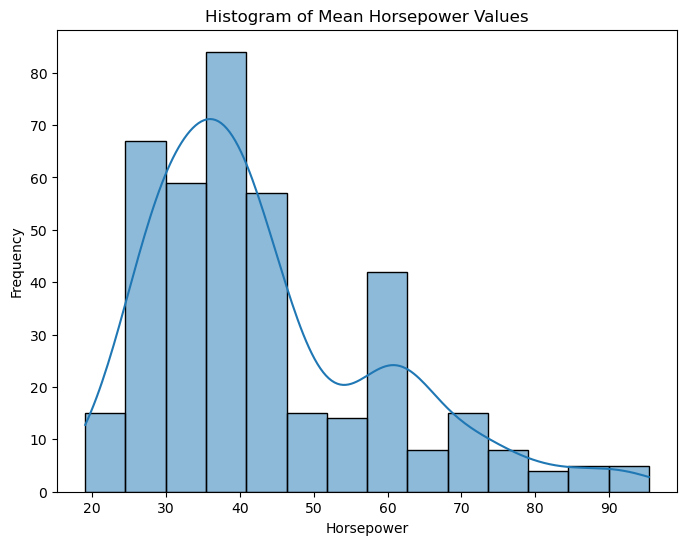

In [22]:

# Now, create a histogram of the mean 'horsepower' values
plt.figure(figsize=(8, 6))
sns.histplot(cars['horsepower'], kde=True)

# Set labels and title
plt.title('Histogram of Mean Horsepower Values')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')

# Display plot
plt.show()

In [23]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   weight_kg     398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


             mpg  cylinders  displacement  horsepower  acceleration  \
0    1306.750000          8         307.0   53.905835          12.0   
1    1568.100000          8         350.0   68.418945          11.5   
2    1306.750000          8         318.0   62.199041          11.0   
3    1470.093750          8         304.0   62.199041          12.0   
4    1383.617647          8         302.0   58.052438          10.5   
..           ...        ...           ...         ...           ...   
393   871.166667          4         140.0   35.660783          15.6   
394   534.579545          4          97.0   21.562334          24.6   
395   735.046875          4         135.0   34.831463          11.6   
396   840.053571          4         120.0   32.758162          18.6   
397   758.758065          4         119.0   34.002142          19.4   

     model year  origin   car name    weight_kg  
0            70       1  chevrolet  1589.386368  
1            70       1      buick  1675.115256

From categorial values we have the carcar name and the origin.

In [32]:
cars_cat = cars[["car name", "origin"]]
cars_cat.head(16)

,car name,origin
0,chevrolet,1
1,buick,1
2,plymouth,1
3,amc,1
4,ford,1
5,ford,1
6,chevrolet,1
7,plymouth,1
8,pontiac,1
9,amc,1


In [49]:
cars_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car name  398 non-null    object
 1   origin    398 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


Lets convert categorial values from text to number: 

In [33]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cars_cat_encoded = ordinal_encoder.fit_transform(cars_cat)

In [34]:
cars_cat_encoded[:16]

array([[ 7.,  0.],
       [ 3.,  0.],
       [25.,  0.],
       [ 0.,  0.],
       [13.,  0.],
       [13.,  0.],
       [ 7.,  0.],
       [25.,  0.],
       [26.,  0.],
       [ 0.,  0.],
       [11.,  0.],
       [25.,  0.],
       [ 7.,  0.],
       [ 3.,  0.],
       [30.,  2.],
       [25.,  0.]])

In [35]:
# values and id array 
# constrains : two nearby values are more similar than two far away.
# let's use one hot encoding to convert the categorial values to binary values.
ordinal_encoder.categories_

[array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt',
        'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat',
        'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes',
        'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel',
        'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru',
        'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo',
        'vw'], dtype=object),
 array([1, 2, 3])]

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cars_cat_1hot  = cat_encoder.fit_transform(cars_cat)

In [37]:
#SciPy output sparse matrix, we can convert it to a NumPy array using the toarray() method:
cars_cat_1hot

<398x40 sparse matrix of type '<class 'numpy.float64'>'
	with 796 stored elements in Compressed Sparse Row format>

In [48]:
#Sparse matrix is very effecient representation of data that has many 0 values.
# we convert it to a dense array. if neeed by toArray() otherwise set sparse=false
cars_cat_1hot.toarray().shape

(398, 40)